In [52]:
import numpy as np
import pandas as pd
import util as utils
import glob


### Load Data

In [53]:
config = utils.load_config()
files = glob.glob(config["data_path"])
dataset = pd.DataFrame()
for f in files:
    csv = pd.read_csv(f)
    dataset = dataset.append(csv)

C:\Users\myusu\AppData\Local\Temp\ipykernel_16620\2671929710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(csv)
C:\Users\myusu\AppData\Local\Temp\ipykernel_16620\2671929710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(csv)
C:\Users\myusu\AppData\Local\Temp\ipykernel_16620\2671929710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(csv)
C:\Users\myusu\AppData\Local\Temp\ipykernel_16620\2671929710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(csv)
C:\Users\myusu\AppData\Local\Temp\ipykernel_16620\2671929710.py:6: Futur

In [54]:
dataset.isnull().sum()

tanggal       0
stasiun       0
pm10          1
pm25        372
so2           6
co            4
o3           12
no2          19
max           0
critical      6
categori      0
dtype: int64

In [55]:
dataset = dataset.replace('SEDANG', 'BAIK')
    
dataset = dataset.drop(dataset[dataset['categori'] == 'TIDAK ADA DATA'].index)
# pm10,pm25,so2,co,o3,no2,max,critical
dataset = dataset.drop(dataset[dataset['pm10'] == '---'].index)
dataset = dataset.drop(dataset[dataset['pm25'] == '---'].index)
dataset = dataset.drop(dataset[dataset['so2'] == '---'].index)
dataset = dataset.drop(dataset[dataset['co'] == '---'].index)
dataset = dataset.drop(dataset[dataset['o3'] == '---'].index)
dataset = dataset.drop(dataset[dataset['no2'] == '---'].index)
dataset = dataset.drop(dataset[dataset['max'] == '---'].index)
dataset = dataset.drop(dataset[dataset['critical'] == '---'].index)
dataset

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2021-02-01,DKI1 (Bunderan HI),59,79,21,26,15,31,79,PM25,BAIK
1,2021-02-02,DKI1 (Bunderan HI),30,46,21,14,16,24,46,PM25,BAIK
2,2021-02-03,DKI1 (Bunderan HI),23,33,19,11,14,19,33,PM25,BAIK
3,2021-02-04,DKI1 (Bunderan HI),36,53,23,14,12,24,53,PM25,BAIK
4,2021-02-05,DKI1 (Bunderan HI),29,36,20,14,12,21,36,PM25,BAIK
...,...,...,...,...,...,...,...,...,...,...,...
148,2021-03-25,DKI5 (Kebon Jeruk) Jakarta Barat,23,53,23,4,21,5,53,PM25,BAIK
149,2021-03-26,DKI5 (Kebon Jeruk) Jakarta Barat,48,79,24,10,23,19,79,PM25,BAIK
152,2021-03-29,DKI5 (Kebon Jeruk) Jakarta Barat,54,91,21,17,29,26,91,PM25,BAIK
153,2021-03-30,DKI5 (Kebon Jeruk) Jakarta Barat,44,72,35,8,18,18,72,PM25,BAIK


### Analisa data

In [56]:
# dataset["categori"].value_counts(normalize=True)
dataset["categori"].value_counts()

BAIK           460
TIDAK SEHAT     26
Name: categori, dtype: int64

In [57]:
x = dataset[config["data_columns"]].copy()
y = dataset[config["label"]].copy()

#### Label Encoding

In [58]:
y = y.apply(lambda x: 1 if x == "BAIK" else 0)

### Data Imbalance, maka dilakukan penyesuaian dengan menggunakan Random Undersampling

In [59]:
from imblearn.under_sampling import RandomUnderSampler

In [60]:
x_bal, y_bal = RandomUnderSampler(random_state = 42).fit_resample(x, y)
dataset_bal = pd.concat([x_bal, y_bal], axis = 1)
dataset_bal

,pm10,so2,co,o3,no2,categori
0,73,28,18,26,18,0
1,68,26,22,30,14,0
2,68,39,18,24,14,0
3,70,29,26,15,34,0
4,61.0,15.0,28.0,198.0,8.0,0
5,41.0,13.0,26.0,128.0,8.0,0
6,56.0,22.0,23.0,101.0,NaN,0
7,27.0,12.0,16.0,103.0,NaN,0
8,42.0,13.0,27.0,127.0,NaN,0
9,40.0,10.0,7.0,143.0,3.0,0


#### Inputer

In [61]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
result_mean_imputer = imp.fit_transform(x_bal)
x_bal = pd.DataFrame(result_mean_imputer, columns=x_bal.columns)

#### Train test split

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x_bal,
                                                    y_bal,
                                                    test_size = 0.2,
                                                    stratify = y_bal,
                                                    random_state = 123)

In [64]:
x_train
y_train.value_counts()
# y_test.value_counts()

1    21
0    20
Name: categori, dtype: int64

Baseline model klasifikasi: akurasi = proporsi kelas terbesar

**Tentukan baseline model**

- Buat random guess berdasarkan proporsi kelas
- Probability diabetes adalah ~34% dan non-diabetes ~66%
- Gunakan `DummyClassifier`

In [65]:
from sklearn.dummy import DummyClassifier

In [66]:
# Buat objek
dummy_clf = DummyClassifier(strategy = "most_frequent")

# Lakukan fit, untuk data y_train saja
dummy_clf.fit(X = x_train,
              y = y_train)

DummyClassifier(strategy='most_frequent')

In [67]:
y_pred_dummy = dummy_clf.predict(x_train)

#### Confusion Matrix baseline model

In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
confusion_matrix(y_true = y_train,
                 y_pred = y_pred_dummy)

array([[ 0, 20],
       [ 0, 21]], dtype=int64)

In [70]:
from sklearn.metrics import accuracy_score

In [71]:
accuracy_score(y_true = y_train,
               y_pred = y_pred_dummy)
# Sama seperti proporsi kelas terbesar

0.5121951219512195

Tidak perlu dilakukan scaling karena satuan data sudah sama

### Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
logreg = LogisticRegression(solver = "liblinear",
                            random_state = 123)

In [74]:
# Eksperimentasi
from sklearn.model_selection import GridSearchCV

In [75]:
search_params = {"penalty": ["l1", "l2"],
                 "C": np.logspace(-5, 5, 20)}

logreg_cv = GridSearchCV(estimator = logreg,
                         param_grid = search_params,
                         cv = 5)

In [76]:
logreg_cv.fit(X = x_train,
              y = y_train)
logreg_cv.best_params_

C:\Users\myusu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\myusu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\myusu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\myusu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear 

{'C': 69.51927961775606, 'penalty': 'l1'}

In [77]:
# Buat best model
logreg = LogisticRegression(penalty = logreg_cv.best_params_["penalty"],
                            C = logreg_cv.best_params_["C"],
                            solver = "liblinear",
                            random_state = 123)

# Fit model
logreg.fit(x_train, y_train)

C:\Users\myusu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(C=69.51927961775606, penalty='l1', random_state=123,
                   solver='liblinear')

In [78]:
# Buat prediksi probability
y_pred_train_proba = logreg.predict_proba(x_train)
y_pred_train_proba

# [1 - P(y = 1), P(y = 1)]

array([[9.99999157e-01, 8.43067912e-07],
       [7.74451034e-04, 9.99225549e-01],
       [9.90348152e-01, 9.65184763e-03],
       [8.25925137e-01, 1.74074863e-01],
       [1.48918877e-10, 1.00000000e+00],
       [1.00000000e+00, 5.52433583e-26],
       [8.67977639e-01, 1.32022361e-01],
       [9.41539433e-01, 5.84605670e-02],
       [3.07652899e-04, 9.99692347e-01],
       [4.96240629e-07, 9.99999504e-01],
       [1.11022302e-14, 1.00000000e+00],
       [1.00000000e+00, 4.41285326e-11],
       [2.69217022e-02, 9.73078298e-01],
       [1.00000000e+00, 1.09738164e-13],
       [2.01618136e-01, 7.98381864e-01],
       [1.00000000e+00, 4.23804525e-23],
       [2.26699452e-05, 9.99977330e-01],
       [9.99869746e-01, 1.30253645e-04],
       [1.93129189e-05, 9.99980687e-01],
       [5.78973547e-03, 9.94210265e-01],
       [5.07088392e-02, 9.49291161e-01],
       [4.58417667e-01, 5.41582333e-01],
       [1.00000000e+00, 3.87932517e-10],
       [8.55509177e-01, 1.44490823e-01],
       [1.332753

In [79]:
y_pred_train = logreg.predict(x_train)
y_pred_train

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1],
      dtype=int64)

In [80]:
# Tampilkan confusion matrix
confusion_matrix(y_true = y_train,
                 y_pred = y_pred_train)

# [[tp, fp]]
# [[fn, tn]]

array([[20,  0],
       [ 0, 21]], dtype=int64)

In [81]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_true = y_train,
                            y_pred = y_pred_train,
                            target_names = ["baik", "buruk"]))

              precision    recall  f1-score   support

        baik       1.00      1.00      1.00        20
       buruk       1.00      1.00      1.00        21

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41



In [82]:
# Buat prediksi probability
y_pred_test_proba = logreg.predict_proba(x_test)
y_pred_test_proba

array([[7.68704441e-01, 2.31295559e-01],
       [1.00000000e+00, 6.46507705e-20],
       [1.00000000e+00, 7.64271030e-12],
       [9.99999999e-01, 5.58915641e-10],
       [9.05799715e-01, 9.42002851e-02],
       [9.99762576e-01, 2.37423718e-04],
       [1.08235643e-11, 1.00000000e+00],
       [1.20169652e-10, 1.00000000e+00],
       [1.42463819e-12, 1.00000000e+00],
       [8.49564863e-12, 1.00000000e+00],
       [1.55431223e-15, 1.00000000e+00]])

In [83]:
y_pred_test = logreg.predict(x_test)
y_pred_test

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [84]:
confusion_matrix(y_true = y_test,
                 y_pred = y_pred_test)

array([[6, 0],
       [0, 5]], dtype=int64)

In [85]:
print(classification_report(y_true = y_test,
                            y_pred = y_pred_test,
                            target_names = ["baik", "buruk"]))

              precision    recall  f1-score   support

        baik       1.00      1.00      1.00         6
       buruk       1.00      1.00      1.00         5

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



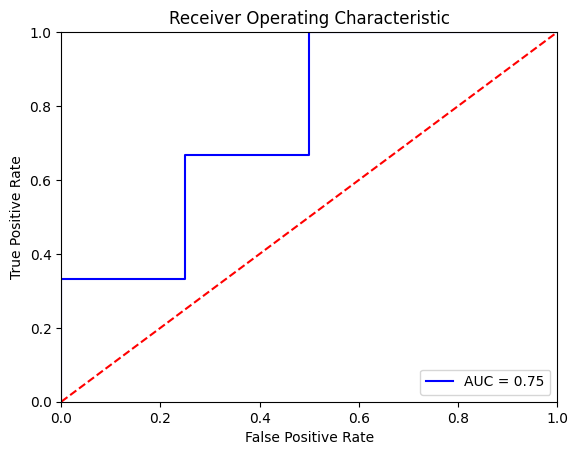

In [37]:
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test,
                                         y_pred_test_proba[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lr, tpr_lr, 'b', label = 'AUC = %0.2f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()